# Norwegian Wind Band Orchestra Competition Analysis
## Comprehensive Analysis of 40+ Years of Competition Data (1981-2025)

This notebook provides in-depth analysis of the complete Norwegian Wind Band Orchestra competition dataset with 2,676 placements across 258 orchestras and 465 conductors.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📊 Libraries loaded successfully!")

📊 Libraries loaded successfully!


In [2]:
# Load the complete dataset
df = pd.read_csv('../data/processed/all_placements.csv')

print(f"🎺 Dataset loaded successfully!")
print(f"Total placements: {len(df):,}")
print(f"Years covered: {df['year'].min()}-{df['year'].max()}")
print(f"Unique orchestras: {df['orchestra'].nunique():,}")
print(f"Unique conductors: {df['conductor'].nunique():,}")

# Display basic info
df.head()

🎺 Dataset loaded successfully!
Total placements: 2,676
Years covered: 1981-2025
Unique orchestras: 258
Unique conductors: 465


,id,year,division,rank,orchestra,conductor,pieces,pieces_list,composers,composers_list,points,max_points,image_url,orchestra_url,conductor_url,piece_urls,scraped_at
0,1981-1-divisjon-01-dragefjellets-musikkorps-be...,1981,1. divisjon,1,Dragefjellets Musikkorps Bergen,Ragnar Maalen,NaN,[],NaN,[],96.5,100.0,http://dragene.no/wp-content/uploads/2016/03/1...,NaN,NaN,NaN,2025-08-25T20:48:53.834860
1,1981-1-divisjon-02-bispehaugen-ungdomskorps,1981,1. divisjon,2,Bispehaugen Ungdomskorps,Sigmund Ofstad,NaN,[],NaN,[],91.2,100.0,https://nmbrass.no/nmjanitsjar/static/bispehau...,NaN,NaN,NaN,2025-08-25T20:48:53.834865
2,1981-2-divisjon-01-nittedal-og-hakadal-janitsjar,1981,2. divisjon,1,Nittedal og Hakadal Janitsjar,Rolf Myhre,NaN,[],NaN,[],90.4,100.0,http://musikkorps.no/wp-content/uploads/2015/0...,NaN,NaN,NaN,2025-08-25T20:48:53.834868
3,1981-2-divisjon-02-sandefjord-musikkorps,1981,2. divisjon,2,Sandefjord Musikkorps,Per Christian Ormar,NaN,[],NaN,[],90.4,100.0,http://www.sandefjord-musikkorps.no/assets/ima...,NaN,NaN,NaN,2025-08-25T20:48:53.834870
4,1981-2-divisjon-03-årstad-musikkorps,1981,2. divisjon,3,Årstad Musikkorps,Helge Haukås,NaN,[],NaN,[],85.5,100.0,NaN,NaN,NaN,NaN,2025-08-25T20:48:53.834872


In [4]:
# Data overview and quality check
print("📋 Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"\n🔍 Data Types:")
print(df.dtypes)
print(f"\n❓ Missing Values:")
print(df.isnull().sum()[df.isnull().sum() > 0])

📋 Dataset Overview:
Shape: (2676, 17)
Columns: ['id', 'year', 'division', 'rank', 'orchestra', 'conductor', 'pieces', 'pieces_list', 'composers', 'composers_list', 'points', 'max_points', 'image_url', 'orchestra_url', 'conductor_url', 'piece_urls', 'scraped_at']

🔍 Data Types:
id                 object
year                int64
division           object
rank                int64
orchestra          object
conductor          object
pieces             object
pieces_list        object
composers          object
composers_list     object
points            float64
max_points        float64
image_url          object
orchestra_url     float64
conductor_url     float64
piece_urls        float64
scraped_at         object
dtype: object

❓ Missing Values:
conductor          35
pieces           2329
composers        2663
image_url        1406
orchestra_url    2676
conductor_url    2676
piece_urls       2676
dtype: int64


## 📈 Historical Trends Analysis

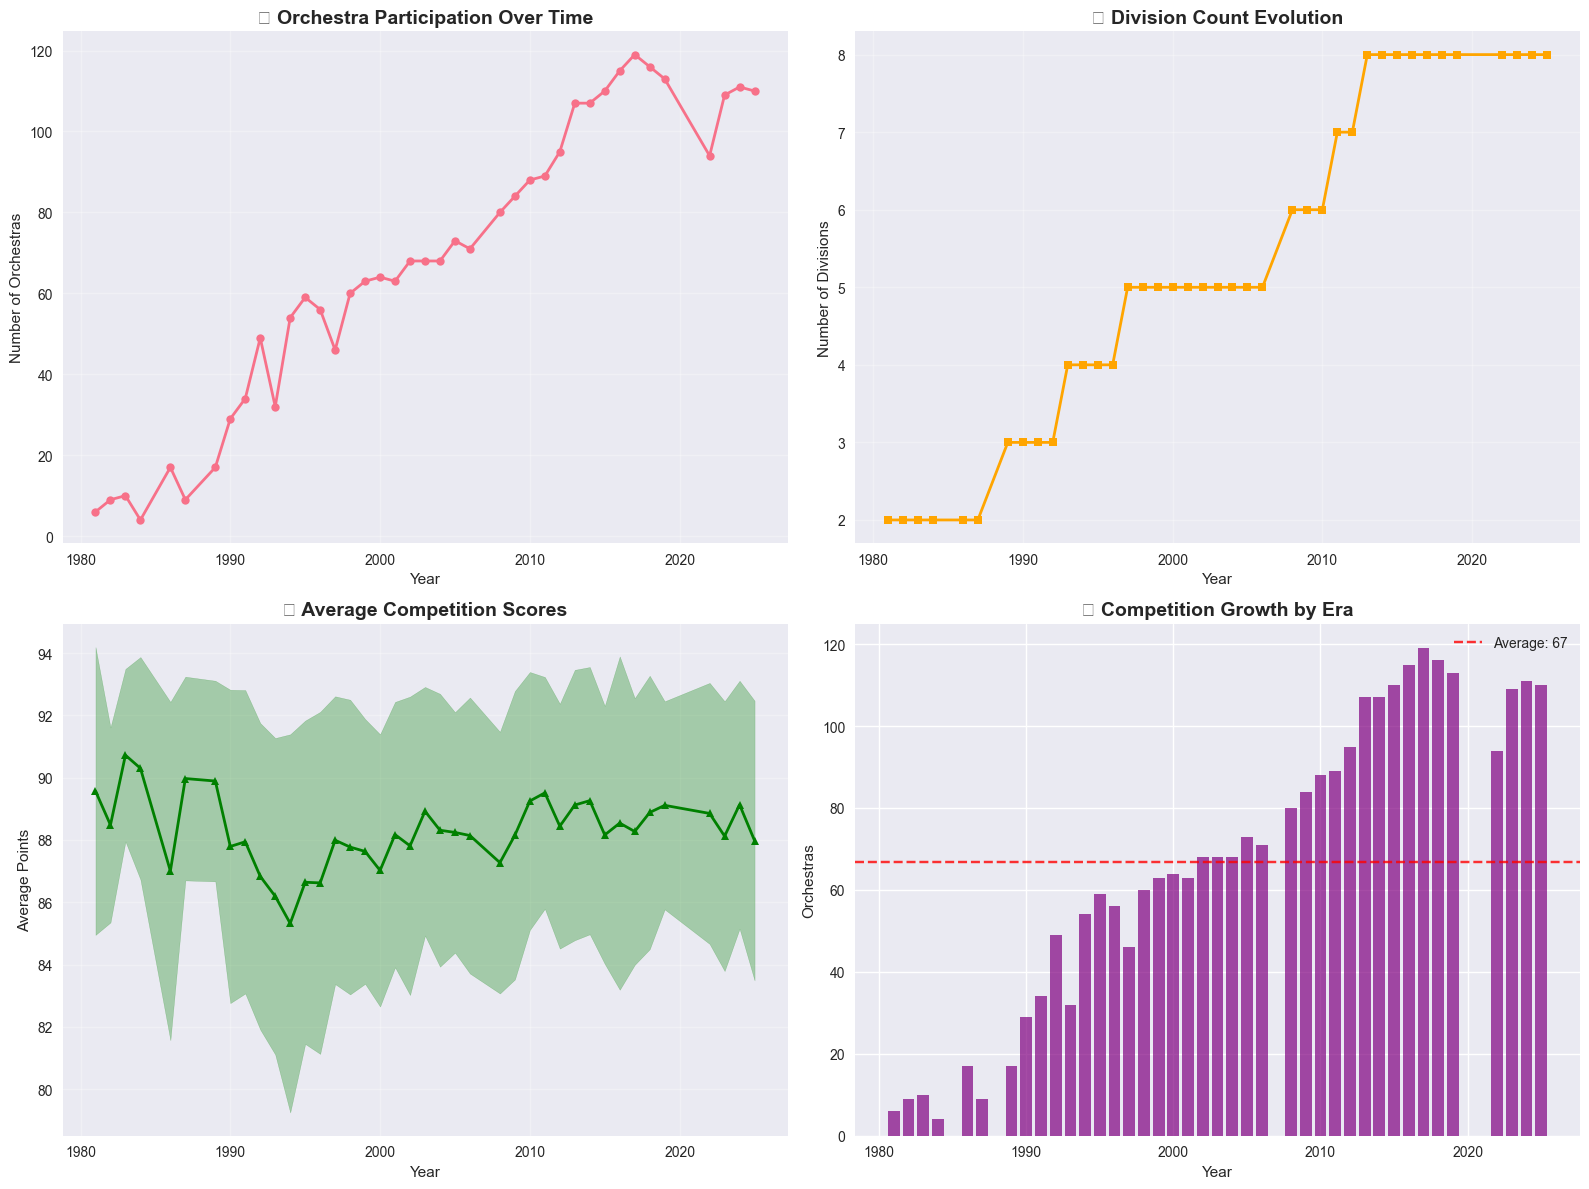

📈 Key Insights:
• Peak participation: 119 orchestras in 2017
• Most divisions: 8 in 2013
• Highest avg score: 90.7 in 1983


In [5]:
# Competition participation over time
yearly_stats = df.groupby('year').agg({
    'orchestra': 'count',
    'division': 'nunique',
    'points': ['mean', 'std']
}).round(2)

yearly_stats.columns = ['Total_Orchestras', 'Divisions', 'Avg_Points', 'StdDev_Points']
yearly_stats = yearly_stats.reset_index()

# Create subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Participation over time
ax1.plot(yearly_stats['year'], yearly_stats['Total_Orchestras'], marker='o', linewidth=2, markersize=6)
ax1.set_title('🎺 Orchestra Participation Over Time', fontsize=14, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Orchestras')
ax1.grid(True, alpha=0.3)

# Plot 2: Number of divisions over time
ax2.plot(yearly_stats['year'], yearly_stats['Divisions'], marker='s', color='orange', linewidth=2, markersize=6)
ax2.set_title('🏆 Division Count Evolution', fontsize=14, fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Divisions')
ax2.grid(True, alpha=0.3)

# Plot 3: Average points over time
ax3.plot(yearly_stats['year'], yearly_stats['Avg_Points'], marker='^', color='green', linewidth=2, markersize=6)
ax3.fill_between(yearly_stats['year'], 
                yearly_stats['Avg_Points'] - yearly_stats['StdDev_Points'],
                yearly_stats['Avg_Points'] + yearly_stats['StdDev_Points'],
                alpha=0.3, color='green')
ax3.set_title('📊 Average Competition Scores', fontsize=14, fontweight='bold')
ax3.set_xlabel('Year')
ax3.set_ylabel('Average Points')
ax3.grid(True, alpha=0.3)

# Plot 4: Competition growth phases
ax4.bar(yearly_stats['year'], yearly_stats['Total_Orchestras'], alpha=0.7, color='purple')
ax4.set_title('🚀 Competition Growth by Era', fontsize=14, fontweight='bold')
ax4.set_xlabel('Year')
ax4.set_ylabel('Orchestras')
ax4.axhline(y=yearly_stats['Total_Orchestras'].mean(), color='red', linestyle='--', alpha=0.8, label=f'Average: {yearly_stats["Total_Orchestras"].mean():.0f}')
ax4.legend()

plt.tight_layout()
plt.show()

print(f"📈 Key Insights:")
print(f"• Peak participation: {yearly_stats['Total_Orchestras'].max()} orchestras in {yearly_stats.loc[yearly_stats['Total_Orchestras'].idxmax(), 'year']}")
print(f"• Most divisions: {yearly_stats['Divisions'].max()} in {yearly_stats.loc[yearly_stats['Divisions'].idxmax(), 'year']}")
print(f"• Highest avg score: {yearly_stats['Avg_Points'].max():.1f} in {yearly_stats.loc[yearly_stats['Avg_Points'].idxmax(), 'year']}")

## 🏆 Orchestra Performance Analysis

In [6]:
# Top performing orchestras analysis
orchestra_stats = df.groupby('orchestra').agg({
    'rank': ['count', lambda x: (x == 1).sum(), 'mean'],
    'points': 'mean',
    'year': ['min', 'max']
}).round(2)

orchestra_stats.columns = ['Total_Appearances', 'First_Places', 'Avg_Rank', 'Avg_Points', 'First_Year', 'Last_Year']
orchestra_stats = orchestra_stats.reset_index()
orchestra_stats['Career_Span'] = orchestra_stats['Last_Year'] - orchestra_stats['First_Year'] + 1
orchestra_stats['Win_Rate'] = (orchestra_stats['First_Places'] / orchestra_stats['Total_Appearances'] * 100).round(1)

# Filter for orchestras with significant participation (5+ appearances)
active_orchestras = orchestra_stats[orchestra_stats['Total_Appearances'] >= 5].sort_values('First_Places', ascending=False)

print(f"🎺 Top 15 Most Successful Orchestras (5+ appearances):")
print(active_orchestras[['orchestra', 'First_Places', 'Total_Appearances', 'Win_Rate', 'Avg_Points', 'Career_Span']].head(15))

🎺 Top 15 Most Successful Orchestras (5+ appearances):
                           orchestra  First_Places  Total_Appearances  \
102            Lillestrøm Musikkorps            13                 36   
32         Christiania Blåseensemble             8                 15   
35   Dragefjellets Musikkorps Bergen             6                 32   
178          Sandvikens Ungdomskorps             6                 35   
154                          Opus 82             5                 30   
176            Sandefjord Musikkorps             5                 33   
121       Musikkforeningen Nidarholm             4                 32   
179         Sarpsborg Janitsjarkorps             4                 27   
63                Greåker Musikkorps             4                 22   
108             Lørenskog Musikkorps             4                 36   
163           Ranheim Musikkforening             4                 26   
92           Kolbotn Konsertorkester             4                 32 

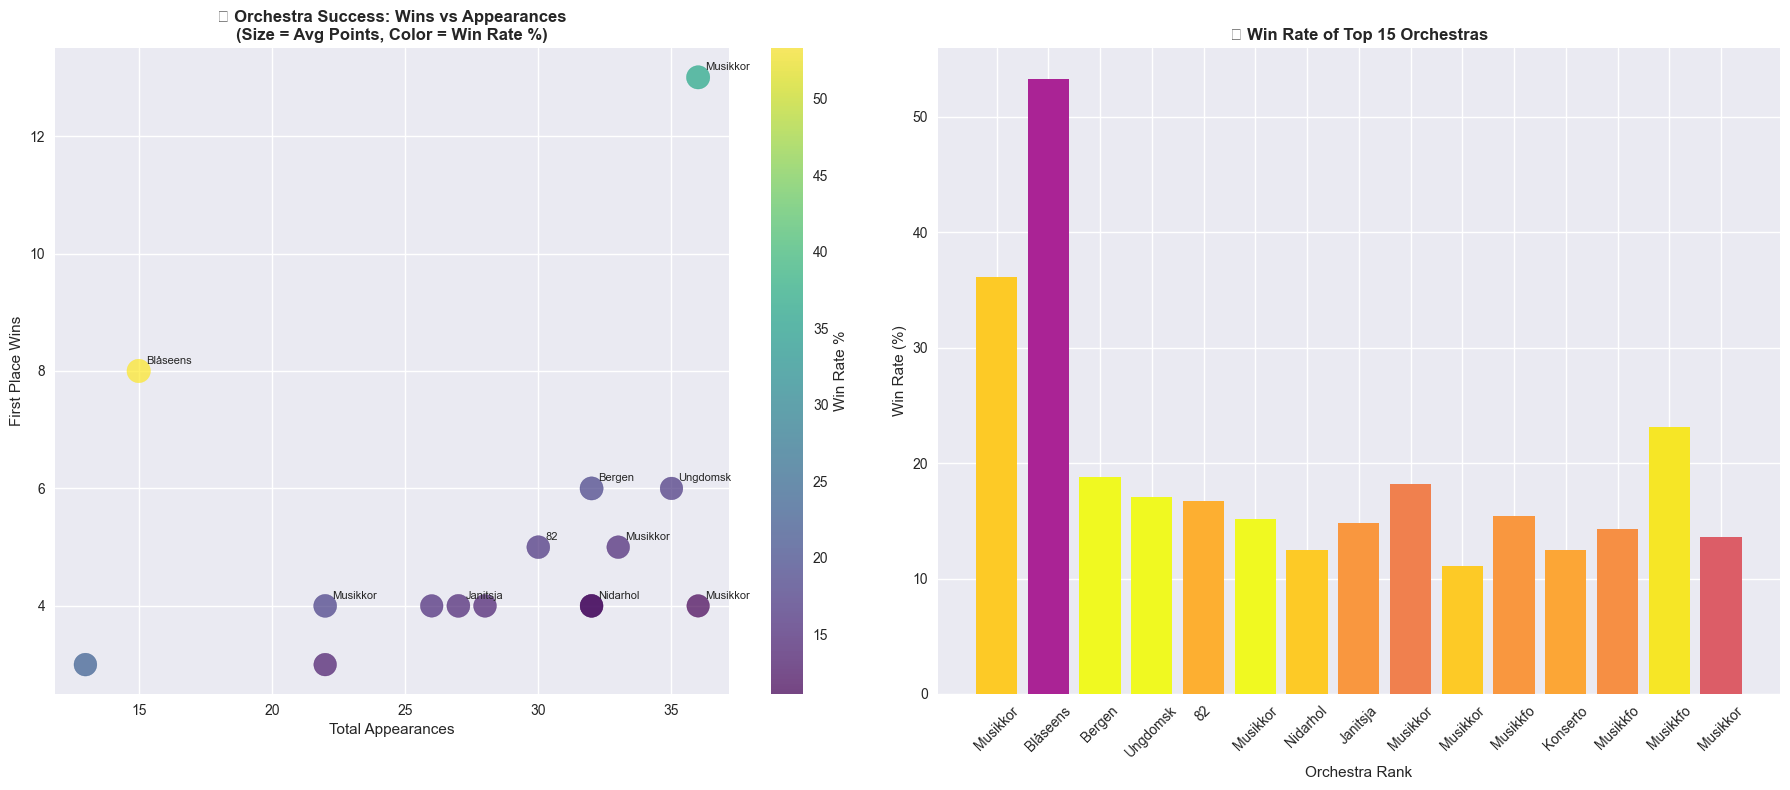

In [7]:
# Visualization: Orchestra success metrics
top_15 = active_orchestras.head(15)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Chart 1: Wins vs Appearances
scatter = ax1.scatter(top_15['Total_Appearances'], top_15['First_Places'], 
                     s=top_15['Avg_Points']*3, alpha=0.7, c=top_15['Win_Rate'], 
                     cmap='viridis')
ax1.set_xlabel('Total Appearances')
ax1.set_ylabel('First Place Wins')
ax1.set_title('🏆 Orchestra Success: Wins vs Appearances\n(Size = Avg Points, Color = Win Rate %)', fontweight='bold')
plt.colorbar(scatter, ax=ax1, label='Win Rate %')

# Add labels for top performers
for i, row in top_15.head(10).iterrows():
    ax1.annotate(row['orchestra'].split()[-1][:8], 
                (row['Total_Appearances'], row['First_Places']),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

# Chart 2: Win rate by career span
bars = ax2.bar(range(len(top_15)), top_15['Win_Rate'], 
               color=plt.cm.plasma(top_15['Career_Span']/top_15['Career_Span'].max()))
ax2.set_xlabel('Orchestra Rank')
ax2.set_ylabel('Win Rate (%)')
ax2.set_title('📊 Win Rate of Top 15 Orchestras', fontweight='bold')
ax2.set_xticks(range(len(top_15)))
ax2.set_xticklabels([name.split()[-1][:8] for name in top_15['orchestra']], rotation=45)

plt.tight_layout()
plt.show()

## 🎭 Conductor Analysis

In [8]:
# Conductor performance analysis (excluding missing conductors)
conductor_df = df[df['conductor'].notna()].copy()

conductor_stats = conductor_df.groupby('conductor').agg({
    'rank': ['count', lambda x: (x == 1).sum(), 'mean'],
    'points': 'mean',
    'orchestra': 'nunique',
    'year': ['min', 'max']
}).round(2)

conductor_stats.columns = ['Total_Competitions', 'Wins', 'Avg_Rank', 'Avg_Points', 'Orchestras_Led', 'First_Year', 'Last_Year']
conductor_stats = conductor_stats.reset_index()
conductor_stats['Career_Span'] = conductor_stats['Last_Year'] - conductor_stats['First_Year'] + 1
conductor_stats['Win_Rate'] = (conductor_stats['Wins'] / conductor_stats['Total_Competitions'] * 100).round(1)

# Filter for conductors with significant experience (3+ competitions)
experienced_conductors = conductor_stats[conductor_stats['Total_Competitions'] >= 3].sort_values('Wins', ascending=False)

print(f"🎭 Top 20 Most Successful Conductors (3+ competitions):")
print(experienced_conductors[['conductor', 'Wins', 'Total_Competitions', 'Win_Rate', 'Avg_Points', 'Orchestras_Led', 'Career_Span']].head(20))

🎭 Top 20 Most Successful Conductors (3+ competitions):
                 conductor  Wins  Total_Competitions  Win_Rate  Avg_Points  \
442     Trond Sverre Myhre     8                  26      30.8       93.68   
138           Ingar Bergby     7                  12      58.3       93.36   
277       Odd Terje Lysebo     6                  21      28.6       91.19   
323               Ray Farr     5                  19      26.3       91.44   
104              Geir Holm     5                  30      16.7       91.47   
86    Erling Johan Myrseth     5                  28      17.9       88.71   
325             Reid Gilje     4                  38      10.5       90.74   
35           Bengt Florvåg     4                  40      10.0       90.84   
118  Hans Andreas Kjølberg     4                  34      11.8       90.07   
346            Rune Hansen     4                  22      18.2       89.61   
391           Thomas Rimul     4                  21      19.0       91.00   
16       

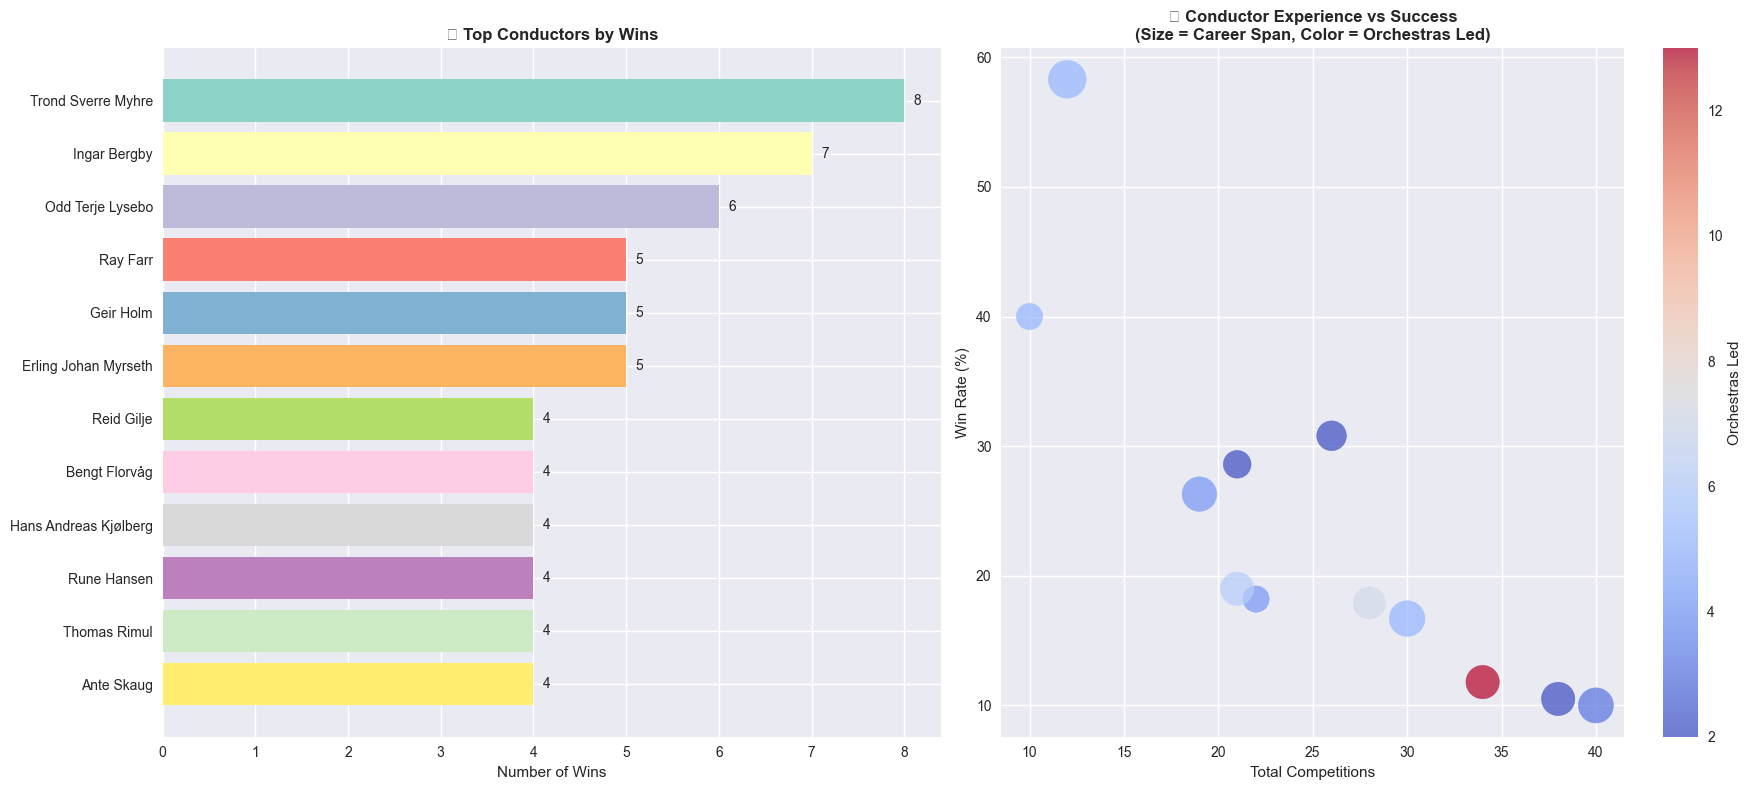

In [9]:
# Conductor success visualization
top_conductors = experienced_conductors.head(12)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Chart 1: Conductor wins
bars1 = ax1.barh(range(len(top_conductors)), top_conductors['Wins'], 
                 color=plt.cm.Set3(range(len(top_conductors))))
ax1.set_yticks(range(len(top_conductors)))
ax1.set_yticklabels(top_conductors['conductor'])
ax1.set_xlabel('Number of Wins')
ax1.set_title('🏆 Top Conductors by Wins', fontweight='bold')
ax1.invert_yaxis()

# Add value labels
for i, bar in enumerate(bars1):
    width = bar.get_width()
    ax1.text(width + 0.1, bar.get_y() + bar.get_height()/2, 
             f'{int(width)}', ha='left', va='center')

# Chart 2: Win rate vs experience
scatter2 = ax2.scatter(top_conductors['Total_Competitions'], top_conductors['Win_Rate'],
                      s=top_conductors['Career_Span']*20, alpha=0.7,
                      c=top_conductors['Orchestras_Led'], cmap='coolwarm')
ax2.set_xlabel('Total Competitions')
ax2.set_ylabel('Win Rate (%)')
ax2.set_title('📊 Conductor Experience vs Success\n(Size = Career Span, Color = Orchestras Led)', fontweight='bold')
plt.colorbar(scatter2, ax=ax2, label='Orchestras Led')

plt.tight_layout()
plt.show()

## 🏅 Division Analysis

In [10]:
# Division performance and competitiveness analysis
division_stats = df.groupby('division').agg({
    'rank': 'count',
    'points': ['mean', 'std', 'min', 'max'],
    'year': ['min', 'max'],
    'orchestra': 'nunique'
}).round(2)

division_stats.columns = ['Total_Placements', 'Avg_Points', 'StdDev_Points', 'Min_Points', 'Max_Points', 'First_Year', 'Last_Year', 'Unique_Orchestras']
division_stats = division_stats.reset_index()
division_stats['Competitiveness'] = (division_stats['StdDev_Points'] / division_stats['Avg_Points'] * 100).round(1)

# Sort divisions logically (Elite first, then numerical)
def division_sort_key(div_name):
    if 'Elite' in div_name:
        return (0, 0)
    elif 'divisjon' in div_name:
        import re
        match = re.search(r'(\d+)', div_name)
        if match:
            return (1, int(match.group(1)))
    return (999, 0)

division_stats['sort_key'] = division_stats['division'].apply(division_sort_key)
division_stats = division_stats.sort_values('sort_key').drop('sort_key', axis=1)

print("🏅 Division Analysis:")
print(division_stats[['division', 'Total_Placements', 'Avg_Points', 'StdDev_Points', 'Unique_Orchestras', 'First_Year', 'Last_Year']])

🏅 Division Analysis:
      division  Total_Placements  Avg_Points  StdDev_Points  \
7        Elite               262       90.86           3.94   
0  1. divisjon               440       89.17           4.10   
1  2. divisjon               538       88.32           4.33   
2  3. divisjon               501       87.22           4.90   
3  4. divisjon               406       87.60           4.34   
4  5. divisjon               233       88.00           4.08   
5  6. divisjon               177       87.13           4.24   
6  7. divisjon               119       87.90           4.34   

   Unique_Orchestras  First_Year  Last_Year  
7                 33        1993       2025  
0                 53        1981       2025  
1                 96        1981       2025  
2                127        1989       2025  
3                113        1997       2025  
4                 86        2008       2025  
5                 64        2011       2025  
6                 70        2013       2025

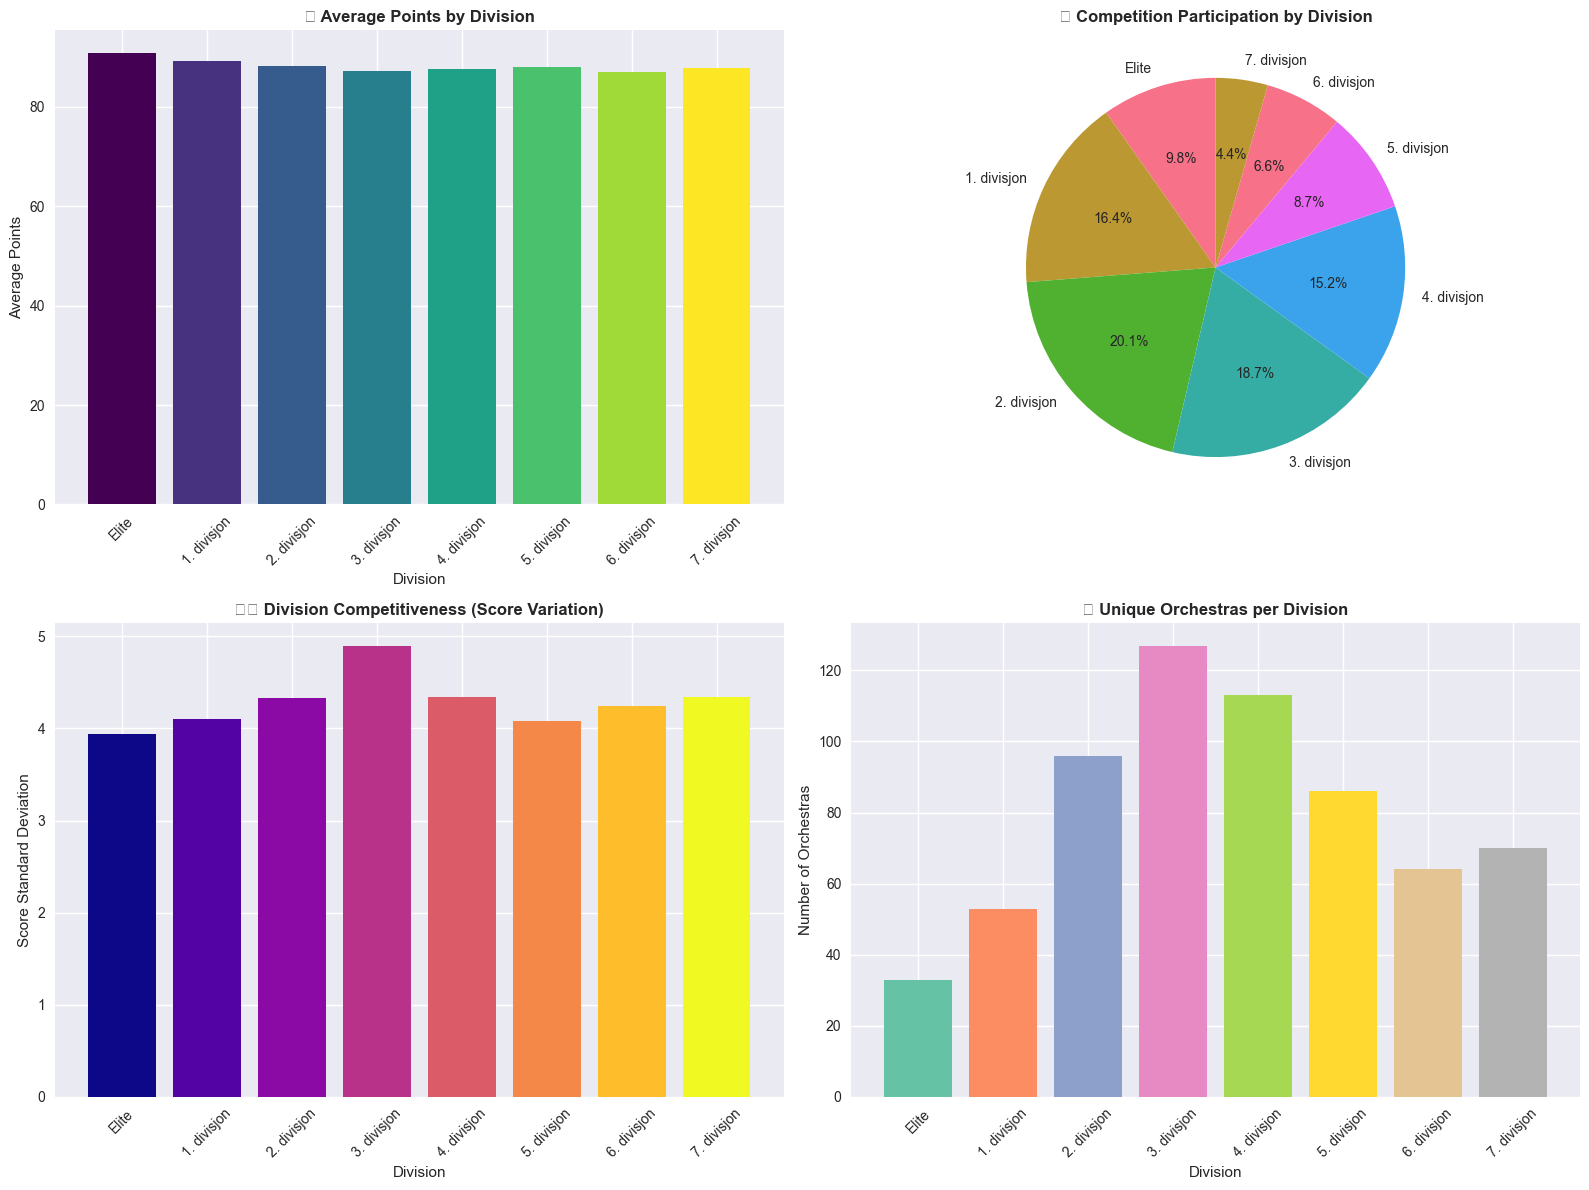

In [11]:
# Division visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Chart 1: Average points by division
bars1 = ax1.bar(division_stats['division'], division_stats['Avg_Points'], 
               color=plt.cm.viridis(np.linspace(0, 1, len(division_stats))))
ax1.set_title('📊 Average Points by Division', fontweight='bold')
ax1.set_xlabel('Division')
ax1.set_ylabel('Average Points')
ax1.tick_params(axis='x', rotation=45)

# Chart 2: Total participation by division
ax2.pie(division_stats['Total_Placements'], labels=division_stats['division'], 
        autopct='%1.1f%%', startangle=90)
ax2.set_title('🎯 Competition Participation by Division', fontweight='bold')

# Chart 3: Division competitiveness (standard deviation)
bars3 = ax3.bar(division_stats['division'], division_stats['StdDev_Points'],
               color=plt.cm.plasma(np.linspace(0, 1, len(division_stats))))
ax3.set_title('⚔️ Division Competitiveness (Score Variation)', fontweight='bold')
ax3.set_xlabel('Division')
ax3.set_ylabel('Score Standard Deviation')
ax3.tick_params(axis='x', rotation=45)

# Chart 4: Unique orchestras per division
bars4 = ax4.bar(division_stats['division'], division_stats['Unique_Orchestras'],
               color=plt.cm.Set2(np.linspace(0, 1, len(division_stats))))
ax4.set_title('🎺 Unique Orchestras per Division', fontweight='bold')
ax4.set_xlabel('Division')
ax4.set_ylabel('Number of Orchestras')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 🔥 Recent Trends (2020-2025)

In [12]:
# Recent trends analysis
recent_df = df[df['year'] >= 2020].copy()

if len(recent_df) > 0:
    print(f"🔥 Recent Trends (2020-2025):")
    print(f"Total recent competitions: {len(recent_df)}")
    print(f"Years with data: {sorted(recent_df['year'].unique())}")
    
    # Recent champions
    recent_champions = recent_df[recent_df['rank'] == 1].groupby('division')['orchestra'].apply(list).to_dict()
    
    print("\n🏆 Recent Champions by Division:")
    for division, champions in recent_champions.items():
        print(f"{division}: {', '.join(set(champions))}")
    
    # Top recent performers
    recent_performers = recent_df.groupby('orchestra').agg({
        'rank': ['count', lambda x: (x == 1).sum(), 'mean'],
        'points': 'mean'
    }).round(2)
    
    recent_performers.columns = ['Appearances', 'Wins', 'Avg_Rank', 'Avg_Points']
    recent_performers = recent_performers.reset_index()
    recent_performers = recent_performers[recent_performers['Appearances'] >= 2].sort_values('Wins', ascending=False)
    
    print("\n⭐ Top Recent Performers (2+ appearances):")
    print(recent_performers.head(10))
else:
    print("No recent data available (2020-2025 range)")

🔥 Recent Trends (2020-2025):
Total recent competitions: 424
Years with data: [np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025)]

🏆 Recent Champions by Division:
1. divisjon: Alvøens Musikkforening, Skjold Nesttun Janitsjar, Nittedal og Hakadal Janitsjar, Sarpsborg Janitsjarkorps
2. divisjon: Sandvikens Ungdomskorps, Bjølsen Ungdomskorps, Lørenskog Musikkorps, Asker Musikkorps
3. divisjon: Sykkylven Janitsjarorkester, Vestsidens Musikkorps, Musikklaget Brage, Nes Janitsjarkorps
4. divisjon: Skedsmo Janitsjarorkester, Kongsberg Byorkester, Hygge Korpsensemble, Nes Janitsjarkorps
5. divisjon: Lørenskog Blåseensemble, Hygge Korpsensemble, Hamar Musikkorps, Nidarvoll Ungdomskorps
6. divisjon: Bjørgvin Blåseensemble, TUBE, Lørenskog Blåseensemble, Hygge Korpsensemble
7. divisjon: Kila Musikkforening, TUBE, Arendal Ungdomsmusikkorps, Hygge Korpsensemble
Elite: Strusshamn Musikkforening, Christiania Blåseensemble, Musikkforeningen Nidarholm

⭐ Top Recent Performers (2+ appearance

## 📊 Interactive Visualizations with Plotly

In [13]:
# Interactive timeline of competition participation
fig = px.line(yearly_stats, x='year', y='Total_Orchestras', 
              title='🎺 Orchestra Participation Over Time (Interactive)',
              labels={'Total_Orchestras': 'Number of Orchestras', 'year': 'Year'},
              hover_data=['Divisions', 'Avg_Points'])

fig.add_scatter(x=yearly_stats['year'], y=yearly_stats['Total_Orchestras'], 
                mode='markers', marker_size=8, name='Data Points')

fig.update_layout(height=500, hovermode='x unified')
fig.show()

In [14]:
# Interactive orchestra success bubble chart
fig = px.scatter(active_orchestras.head(20), 
                x='Total_Appearances', y='First_Places',
                size='Avg_Points', color='Win_Rate',
                hover_name='orchestra',
                hover_data=['Career_Span', 'Avg_Points'],
                title='🏆 Orchestra Success Analysis (Interactive)',
                labels={'Total_Appearances': 'Total Competitions',
                       'First_Places': 'Championships Won',
                       'Win_Rate': 'Win Rate (%)'},
                color_continuous_scale='viridis')

fig.update_layout(height=600)
fig.show()

## 💡 Key Insights & Conclusions

In [15]:
# Generate key insights
print("🎯 KEY INSIGHTS FROM 40+ YEARS OF NORWEGIAN WIND BAND ORCHESTRA COMPETITIONS:")
print("=" * 80)

# Competition growth
growth_rate = ((yearly_stats['Total_Orchestras'].iloc[-1] - yearly_stats['Total_Orchestras'].iloc[0]) / 
               yearly_stats['Total_Orchestras'].iloc[0] * 100)
print(f"📈 GROWTH: Competition has grown {growth_rate:.0f}% from {yearly_stats['Total_Orchestras'].iloc[0]} to {yearly_stats['Total_Orchestras'].iloc[-1]} orchestras")

# Most successful orchestra
top_orchestra = active_orchestras.iloc[0]
print(f"🏆 CHAMPION: {top_orchestra['orchestra']} dominates with {top_orchestra['First_Places']} wins ({top_orchestra['Win_Rate']}% win rate)")

# Most successful conductor
top_conductor = experienced_conductors.iloc[0]
print(f"🎭 TOP CONDUCTOR: {top_conductor['conductor']} with {top_conductor['Wins']} wins across {top_conductor['Orchestras_Led']} orchestras")

# Competition level
elite_avg = division_stats[division_stats['division'] == 'Elite']['Avg_Points'].iloc[0] if 'Elite' in division_stats['division'].values else 0
if elite_avg > 0:
    print(f"⭐ ELITE LEVEL: Elite division averages {elite_avg} points, showing exceptional performance")

# Diversity
print(f"🎺 DIVERSITY: {df['orchestra'].nunique()} different orchestras have competed over the years")
print(f"🎭 CONDUCTORS: {df['conductor'].nunique()} conductors have led competitions")

# Recent trends
recent_years = df[df['year'] >= 2020]
if len(recent_years) > 0:
    recent_avg = recent_years['points'].mean()
    historical_avg = df[df['year'] < 2020]['points'].mean()
    trend = "higher" if recent_avg > historical_avg else "lower"
    print(f"🔥 RECENT TREND: Modern competitions show {trend} average scores ({recent_avg:.1f} vs {historical_avg:.1f})")

print("\n" + "=" * 80)
print(f"📊 Dataset: {len(df):,} placements • {df['year'].nunique()} years • {df['orchestra'].nunique()} orchestras • {df['conductor'].nunique()} conductors")

🎯 KEY INSIGHTS FROM 40+ YEARS OF NORWEGIAN WIND BAND ORCHESTRA COMPETITIONS:
📈 GROWTH: Competition has grown 1733% from 6 to 110 orchestras
🏆 CHAMPION: Lillestrøm Musikkorps dominates with 13 wins (36.1% win rate)
🎭 TOP CONDUCTOR: Trond Sverre Myhre with 8 wins across 2 orchestras
⭐ ELITE LEVEL: Elite division averages 90.86 points, showing exceptional performance
🎺 DIVERSITY: 258 different orchestras have competed over the years
🎭 CONDUCTORS: 465 conductors have led competitions
🔥 RECENT TREND: Modern competitions show higher average scores (88.5 vs 88.2)

📊 Dataset: 2,676 placements • 40 years • 258 orchestras • 465 conductors


## 🚀 Next Steps & Advanced Analysis Ideas

### Potential Further Analysis:
1. **Geographic Analysis**: Map orchestra locations and regional performance
2. **Time Series Forecasting**: Predict future participation trends
3. **Network Analysis**: Conductor-orchestra relationships over time
4. **Musical Piece Analysis**: Most popular pieces and their success rates
5. **Scoring Evolution**: How judging standards have changed
6. **Competitive Balance**: Measuring division parity over time
7. **Career Trajectories**: Track individual orchestra/conductor journeys

### Export Options:
- Export visualizations as PNG/SVG for publications
- Create PowerBI/Tableau dashboards
- Build interactive web applications
- Generate automated reports

### Data Enhancement:
- Add geographic coordinates for mapping
- Include orchestra founding dates and history
- Expand conductor biographical data
- Add musical piece difficulty ratings

**This comprehensive analysis provides a solid foundation for understanding 40+ years of Norwegian wind band orchestra competition history!** 🎺✨